In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from beautifultable import BeautifulTable
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [5]:
data = pd.read_csv("data.csv")

In [6]:
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

<IPython.core.display.Javascript object>

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Pandas: 1.0.5
Numpy: 1.16.5


<IPython.core.display.Javascript object>

Sklearn: 0.21.3


In [7]:
#data view
data.head(4)

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city
0,8533875475515924645,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,4874599869430831185,2,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,361954421372951638,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,8751850432978942600,2,20170205,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset


In [8]:
# function to do basic check(reusable code)
def basic_check(__input__):
    table = BeautifulTable()
    a = []
    a= __input__.columns
    table.column_headers = ["features","feature_datatype","unique_value","missing_values", "missing_values_%"]
    for i in a:
        table.append_row([i,__input__[i].dtype,__input__[i].nunique(),__input__[i].isna().sum(),
        ((__input__[i].isna().sum()) / (__input__[i].shape[0])*100)])
    print(table)  

In [9]:
basic_check(data)

+-----------------+---------------+--------------+-------------+---------------+
|    features     | feature_datat | unique_value | missing_val | missing_value |
|                 |      ype      |              |     ues     |      s_%      |
+-----------------+---------------+--------------+-------------+---------------+
|  fullVisitorID  |    object     |    324787    |      0      |      0.0      |
+-----------------+---------------+--------------+-------------+---------------+
|   visitNumber   |     int64     |     376      |      0      |      0.0      |
+-----------------+---------------+--------------+-------------+---------------+
|      date       |     int64     |     181      |      0      |      0.0      |
+-----------------+---------------+--------------+-------------+---------------+
|     bounces     |    float64    |      1       |   196928    |    50.123     |
+-----------------+---------------+--------------+-------------+---------------+
|      hits       |     int6

In [10]:
data.shape

(392892, 15)

In [11]:
data.head()

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city
0,8533875475515924645,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,4874599869430831185,2,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,361954421372951638,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,8751850432978942600,2,20170205,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset
4,2451058030378352110,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
visitNumber,392892.0,2.361198e+00,10.158865,1.0,1.00,1.00,1.00,389.00
date,392892.0,2.017037e+07,169.257074,20170101.0,20170216.00,20170331.00,20170516.00,20170630.00
bounces,195964.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00
hits,392892.0,4.414065e+00,8.555069,1.0,1.00,2.00,4.00,500.00
pageviews,392856.0,3.771015e+00,6.414908,1.0,1.00,1.00,4.00,466.00
timeOnSite,196399.0,2.768371e+02,485.765241,1.0,33.00,94.00,287.00,12136.00
transactionRevenue,5277.0,1.628382e+02,898.877951,2.2,29.18,53.95,114.53,47082.06
transactions,5277.0,1.047754e+00,0.571294,1.0,1.00,1.00,1.00,25.00


In [13]:
data.columns

Index(['fullVisitorID', 'visitNumber', 'date', 'bounces', 'hits', 'pageviews',
       'timeOnSite', 'transactionRevenue', 'transactions', 'source',
       'channelGrouping', 'browser', 'deviceCategory', 'country', 'city'],
      dtype='object')

In [14]:
data1 = data.drop(['fullVisitorID','date'], axis=1)

In [15]:
data1.head(5)

,visitNumber,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city
0,1,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,2,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,1,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,2,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset
4,1,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset


In [16]:
basic_check(data1)

+-----------------+---------------+--------------+-------------+---------------+
|    features     | feature_datat | unique_value | missing_val | missing_value |
|                 |      ype      |              |     ues     |      s_%      |
+-----------------+---------------+--------------+-------------+---------------+
|   visitNumber   |     int64     |     376      |      0      |      0.0      |
+-----------------+---------------+--------------+-------------+---------------+
|     bounces     |    float64    |      1       |   196928    |    50.123     |
+-----------------+---------------+--------------+-------------+---------------+
|      hits       |     int64     |     198      |      0      |      0.0      |
+-----------------+---------------+--------------+-------------+---------------+
|    pageviews    |    float64    |     155      |     36      |     0.009     |
+-----------------+---------------+--------------+-------------+---------------+
|   timeOnSite    |    float

In [17]:
data2 = data1.drop(['transactionRevenue','transactions'], axis=1) #more than 90% missign values

In [18]:
data3 = data2.fillna(0)

In [19]:
basic_check(data3)

+--------------+----------------+---------------+-------------+----------------+
|   features   | feature_dataty | unique_value  | missing_val | missing_values |
|              |       pe       |               |     ues     |       _%       |
+--------------+----------------+---------------+-------------+----------------+
| visitNumber  |     int64      |      376      |      0      |      0.0       |
+--------------+----------------+---------------+-------------+----------------+
|   bounces    |    float64     |       2       |      0      |      0.0       |
+--------------+----------------+---------------+-------------+----------------+
|     hits     |     int64      |      198      |      0      |      0.0       |
+--------------+----------------+---------------+-------------+----------------+
|  pageviews   |    float64     |      156      |      0      |      0.0       |
+--------------+----------------+---------------+-------------+----------------+
|  timeOnSite  |    float64 

In [20]:
data3.head(5)

,visitNumber,bounces,hits,pageviews,timeOnSite,source,channelGrouping,browser,deviceCategory,country,city
0,1,1.0,1,1.0,0.0,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,2,1.0,1,1.0,0.0,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,1,1.0,1,1.0,0.0,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,2,1.0,1,1.0,0.0,bing,Organic Search,Edge,desktop,United States,not available in demo dataset
4,1,1.0,1,1.0,0.0,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset


In [21]:
X = pd.get_dummies(data3, columns=['source','channelGrouping','browser','deviceCategory','country','city'])

In [22]:
X1 = X.values

In [23]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X1) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.047791,-0.054601
1,0.001303,-0.125268


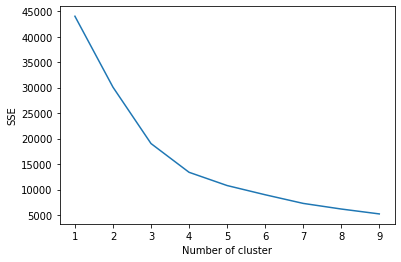

In [23]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

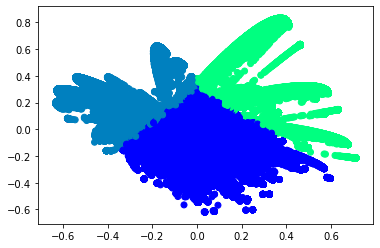

In [24]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 